# Object Tracking: Simple Implementation of Kalman Filter in Python

## Introduction
The Kalman filter is an algorithm used to estimate the state of a system based on observations or measurements. It plays a crucial role in applications like object tracking, autonomous navigation, and economic forecasting.

While the Kalman filter is conceptually straightforward, implementing it in Python can be challenging for some. This tutorial aims to simplify the process with a clear, practical approach, making it easier to understand and apply

## Kalman Filtering Algorithm 
## Discrete Kalman Filter  

This tutorial focuses specifically on the **Discrete Kalman Filter** to demonstrate its practical implementation in a computer program.  

### Concept Overview  

The Kalman filter estimates the state of a system by leveraging prior knowledge to predict the next state. It assumes that the system evolves over time according to a **linear stochastic difference equation**, given by:

$$
\mathbf{x}_k = A\mathbf{x}_{k-1} + B\mathbf{u}_{k-1} + \mathbf{w}_{k-1}    ----(1)
$$ 

where:  
- $A$, an n*n matrix is the **state transition matrix**, relating the previous state $k-1$ to the current state $k$.  
- $B$, an n*l matrix is the **control input matrix**, applied to the optional control input $\mathbf{u}_{k-1}$.
- $\mathbf{w}_{k-1}$ represents the **process noise**.  

To update the estimate, the filter pairs this equation with a **measurement model**, which describes how the state relates to observed measurements:

$$
\mathbf{z}_k = H \mathbf{x}_k + \mathbf{v}_k      ----(2)
$$

where:  

- $H$, an m*n matrix is the **measurement transformation matrix**, mapping the state into the measurement domain.  
- $\mathbf{v}_k$ represents the **measurement noise**.  

### Noise Assumptions  

Both the process noise $\mathbf{w}_k$ and measurement noise $\mathbf{v}_k$ are assumed to follow a **Gaussian distribution** with covariances $Q$ and $R$, respectively:

$$
p(\mathbf{w}) \sim N(0, Q), \quad p(\mathbf{v}) \sim N(0, R)          ----(3)
$$

These noise components are considered **statistically independent**.  

This foundation sets the stage for implementing the **Kalman filter** in a computational environment.



## Kalman Equations  

The Kalman filter equations use two key terms: **a priori** and **a posteriori** estimates.  

- **A priori estimates** represent the predicted state and error covariance, based on the system dynamics and the previously estimated state.  
- **A posteriori estimates** represent the updated state and error covariance after incorporating the new measurement.  

The following notations are used to denote these terms:

- $\hat{\mathbf{x}}^{-}_k$ and $\mathbf{P}^{-}_k$ represent the **a priori** estimates for the state and error covariance, respectively.  
- $\hat{\mathbf{x}}_k$ and $\mathbf{P}_k$ represent the **a posteriori** estimates for the state and error covariance, respectively.  

The Kalman filter equations are divided into two parts:  

1. **Time Update Equations** (also known as predictor equations)  
2. **Measurement Update Equations** (also known as corrector equations)  

These two steps are sometimes referred to as the **predictor-corrector** or **prediction-update** process in literature.  

The **time update equations** are responsible for projecting the current state and error covariance estimates forward, to obtain the **a priori** estimates for the next time step.  

The **measurement update equations** are responsible for incorporating a new measurement into the **a priori** estimates to compute the **a posteriori** estimates.


## Time Update Equations  

In the **time update equations**, we calculate the predicted state estimate (a priori state estimate) $\hat{\mathbf{x}}^{-}_k$ and predicted error covariance (a priori error covariance estimate) $\mathbf{P}^{-}_k$.  

### Predicted State Estimate  

The a priori state estimate $\hat{\mathbf{x}}^{-}_k$ is predicted using the state dynamic equation model, which projects the state forward by one time step:

$$
\hat{\mathbf{x}}^{-}_k = A \hat{\mathbf{x}}_{k-1} + B \mathbf{u}_{k-1}   ----(4)
$$

where:
- $\hat{\mathbf{x}}_{k-1}$ is the previous estimated state (a posteriori state estimate).  

### Predicted Error Covariance  

The a priori error covariance matrix $\mathbf{P}^{-}_k$ is predicted as:

$$
\mathbf{P}^{-}_k = A \mathbf{P}_{k-1} A^T + \mathbf{Q}           ----(5)
$$

where:
- $\mathbf{P}_{k-1}$ is the previous estimated error covariance matrix.  
- $\mathbf{Q}$ is the process noise covariance.  


## Measurement Update Equations  

During the **measurement update stage**, we compute the **Kalman gain** $\mathbf{K}_k$ as follows:

$$
\mathbf{K}_k = \mathbf{P}^{-}_k H^T \left( H \mathbf{P}^{-}_k H^T + \mathbf{R} \right)^{-1}    ----(6)
$$

where:
- $\mathbf{R}$ is the **measurement noise covariance**.

Next, we obtain the actual measurement $\mathbf{z}_k$.

To update the predicted state estimate $\hat{\mathbf{x}}^{-}_k$, we calculate the **measurement residual**, which is the difference between the true measurement $\mathbf{z}_k$ and the predicted measurement $H \hat{\mathbf{x}}^{-}_k$:

$$
\text{Measurement Residual} = \mathbf{z}_k - H \hat{\mathbf{x}}^{-}_k      ----(7)
$$

To update the predicted state estimate (now called the updated state estimate $\hat{\mathbf{x}}_k$ ), we perform the following operation:

$$
\hat{\mathbf{x}}_k = \hat{\mathbf{x}}^{-}_k + \mathbf{K}_k \left( \mathbf{z}_k - H \hat{\mathbf{x}}^{-}_k \right)       ----(8)
$$

After obtaining the updated state estimate, the filter calculates the updated **error covariance** (a posteriori error covariance estimate) $\mathbf{P}_k$, which will be used in the next time step:

$$
\mathbf{P}_k = (I - \mathbf{K}_k H) \mathbf{P}^{-}_k      ----(9)
$$

where:
- $I$ is the identity matrix.


The figure below descibes the cycle of ongoing discrete Kalman filter.
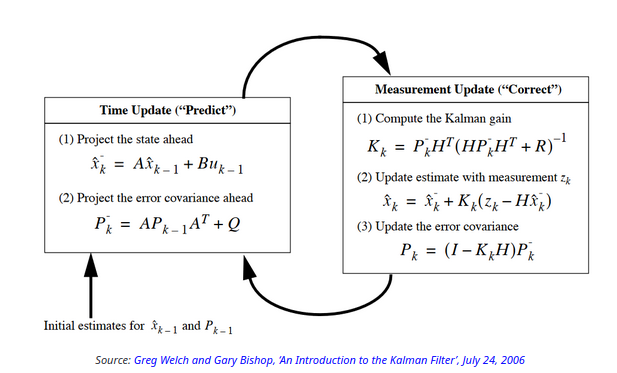

Initially, to implement the Kalman filter we need to guess an initial state $\textbf{\^{x}}_{k-1}$ and error covariance matrix $\textbf{P}_{k-1}$ . The current state estimate will be projected forward to obtain the a priori estimates for the next time step by the time update equations. Then, using the actual measurement, the measurement update equations adjust the projected estimate at that time.

That’s it for Kalman filter theory…

## Implementation
In this example, we want to model a moving object following a simple track as given in the following function:

$$\begin{equation*}f(t)=0.1*(t^2-t)\end{equation*}   ------(10)$$

Our task is to track that object using the Kalman filter from time t=0 to t=100s.

So, let’s get started..

### State transition matrix A and control matrix B
Based on Kinematic equation, the relation between the position x and velocity $\dot x$ can be written as the following:

Position:   
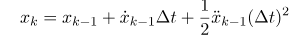       ------(11)                  

Velocity:
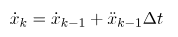   ------(12)

where: $\ddot x$ is the acceleration.

Since the state vector $\textbf{x}_k$ contains the position and velocity, we can model this example as follows: 

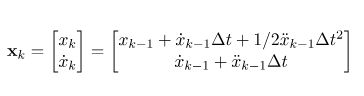   ------(13)

These linear equations can be written in matrix form as:   
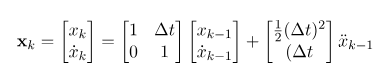   ------(14)

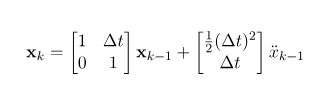   ------(15)


By comparing the eq.(15) to the eq.(1), we have the following relations:
  

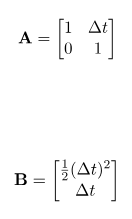

## Transformation matrix H
Measurements of the system can be performed according to the model in eq.(2):

$$\begin{equation*} \textbf{z}_k = H \textbf{x}_k+ \textbf{v}_k \end{equation*}   ------(16)$$

Since we only measure the position, the eq.(16) can be written in matrix form as:

$$\begin{equation*}\textbf{z}_k = \begin{bmatrix} 1 & 0\end{bmatrix} \begin{bmatrix} x_k \\ \dot x_k \\ \end{bmatrix} + \textbf{v}_{k} \end{equation*}     ------(17)$$

So, we have the transformation matrix H as follows:
$$\begin{equation*} \textbf{H}= \begin{bmatrix} 1 & 0\end{bmatrix} \end{equation*}     ------(18)$$

## Process noise covariance matrix Q
The process noise covariance matrix $\textbf{Q}$ or error in the state process is basically can be written as follows:
$$\begin{equation*} \textbf{Q} = \begin{bmatrix} \sigma^2_x & \sigma_x \sigma_{\dot x} \\ \sigma_{\dot x} \sigma_x & \sigma^2_ {\dot x} \\ \end{bmatrix} \end{equation*}     ------(19)$$

where $\sigma_x$ and $\sigma_{\dot x}$ are the standard deviations of the position and the velocity, respectively.

We can define the standard deviation of position as the standard deviation of acceleration $\sigma_a$ multiplied by $\frac{\Delta{t^2}}{2}$. The reason for this is because the $\frac{\Delta{t^2}}{2}$ is the effect that will have on the position. Therefore, by multiplying the standard deviation of the acceleration by $\frac{\Delta{t^2}}{2}$ we’ll have the standard deviation of the position.

Similarly, if we multiply the standard deviation of the acceleration by delta $\Delta{t}$, we’ll get the standard deviation of the velocity.

So, we can write the process covariance noise $\textbf{Q}$ as follows:

$$\begin{equation*} \textbf{Q} = \begin{bmatrix} \frac{\Delta{t^4}}{4} & \frac{\Delta{t^3}}{2} \\ \frac{\Delta{t^3}}{2} & \Delta{t^2} \\ \end{bmatrix} \sigma^2_a \end{equation*}      ------(20)$$


## Measurement noise covariance matrix R
The covariance of the measurement noise R is a scalar and is equal to the variance of the measurement noise. It can be written as:

$$\begin{equation*} R=\sigma^2_z \end{equation*}     ------(21)$$

Now we’re ready to implement it in Python. 

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
class KalmanFilter(object):
    def __init__(self, dt, u, std_acc, std_meas):
        self.dt = dt
        self.u = u
        self.std_acc = std_acc
        self.A = np.matrix([[1, self.dt],
                            [0, 1]])
        self.B = np.matrix([[(self.dt**2)/2], [self.dt]]) 
        self.H = np.matrix([[1,0]])
        self.Q = np.matrix([[(self.dt**4)/4, (self.dt**3)/2],
                            [(self.dt**3)/2, self.dt**2]]) * self.std_acc**2
        self.R = std_meas**2
        self.P = np.eye(self.A.shape[1])
        self.x = np.matrix([[0],[0]])
        
    def predict(self):
        # Ref :Eq.(9) and Eq.(10)
        # Update time state
        self.x = np.dot(self.A, self.x) + np.dot(self.B, self.u)
        # Calculate error covariance
        # P= A*P*A' + Q
        self.P = np.dot(np.dot(self.A, self.P), self.A.T) + self.Q
        return self.x
    
    def update(self, z):
        # Ref :Eq.(11) , Eq.(11) and Eq.(13)
        # S = H*P*H'+R
        S = np.dot(self.H, np.dot(self.P, self.H.T)) + self.R
        # Calculate the Kalman Gain
        # K = P * H'* inv(H*P*H'+R)
        K = np.dot(np.dot(self.P, self.H.T), np.linalg.inv(S))  # Eq.(11)
        self.x = np.round(self.x + np.dot(K, (z - np.dot(self.H, self.x))))  # Eq.(12)
        I = np.eye(self.H.shape[1])
        self.P = (I - (K * self.H)) * self.P  # Eq.(13)

In [4]:
def main():
    dt = 0.1
    t = np.arange(0, 100, dt)

    # Define a model track
    real_track = 0.1*((t**2) - t)

    u= 2
    std_acc = 0.25     # we assume that the standard deviation of the acceleration is 0.25 (m/s^2)
    std_meas = 1.2    # and standard deviation of the measurement is 1.2 (m)

    # create KalmanFilter object
    kf = KalmanFilter(dt, u, std_acc, std_meas)

    predictions = []
    measurements = []
    for x in real_track:
        # Mesurement
        z = kf.H * x + np.random.normal(0, 50)

        measurements.append(z.item(0))
        predictions.append(kf.predict()[0])
        kf.update(z.item(0))


    fig = plt.figure()

    fig.suptitle('Example of Kalman filter for tracking a moving object in 1-D', fontsize=20)

    plt.plot(t, measurements, label='Measurements', color='b',linewidth=0.5)

    plt.plot(t, np.array(real_track), label='Real Track', color='y', linewidth=1.5)
    plt.plot(t, np.squeeze(predictions), label='Kalman Filter Prediction', color='r', linewidth=1.5)

    plt.xlabel('Time (s)', fontsize=20)
    plt.ylabel('Position (m)', fontsize=20)
    plt.legend()
    plt.show()

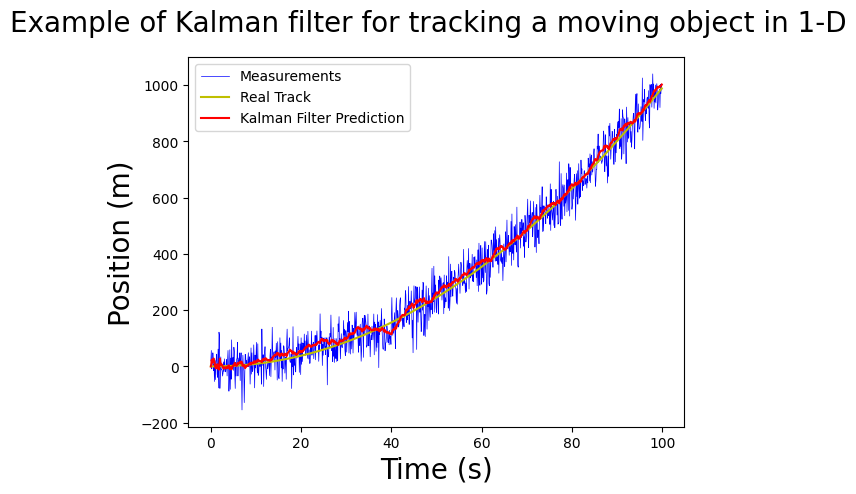

In [5]:
if __name__ == '__main__':
    main()